WEB SCRAPING FROM SUBREDDITS

In [ ]:
pip install praw


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import praw
import pandas as pd

user_agent="Scraper 0.1 by /u/Necessary-Echidna296/"
reddit = praw.Reddit(
    client_id="OAe_ZyQpPluTSP7jR8MGqQ",
    client_secret="7cXZTinh_OaYBKCZRIUZjnVC5w_8EQ",
    user_agent= user_agent
)


In [ ]:
# Define subreddits and parameters
subreddits = ["StockMarket", "IndianStockMarket", "investing","Stocks"]
limit = 250

data = []
for subreddit in subreddits:
    subreddit_data = reddit.subreddit(subreddit)
    for post in subreddit_data.hot(limit=limit):  # 'hot', 'new', or 'top'
        data.append({
            "title": post.title,
            "selftext": post.selftext,
            "score": post.score,
            "num_comments": post.num_comments,
            "created_utc": post.created_utc,
            "permalink": f"https://reddit.com{post.permalink}"
        })

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
df = pd.DataFrame(data)
print(df.head())

                                               title  \
0  Rate My Portfolio - r/StockMarket Quarterly Th...   
1  Daily General Discussion and Advice Thread - D...   
2  If you aren’t having fun in the Yahoo Finance ...   
3  Hoping to reach 22k in my portfolio and I’m ou...   
4                          Investment Strategy 2025    

                                            selftext  score  num_comments  \
0  Please use this thread to discuss your portfol...      3            53   
1  Have a general question?  Want to offer some c...      1             1   
2                                                        51            13   
3                                                        39            95   
4  Hello\nI have been reading that VOO is getting...      4             8   

    created_utc                                          permalink  
0  1.727773e+09  https://reddit.com/r/StockMarket/comments/1ftj...  
1  1.733652e+09  https://reddit.com/r/StockMarket/comments/1h9

In [ ]:
# Save to CSV
df.to_csv("reddit_data.csv", index=False)

In [ ]:
df = pd.read_csv("reddit_data.csv")
print(df.head())


                                               title  \
0  Rate My Portfolio - r/StockMarket Quarterly Th...   
1  Daily General Discussion and Advice Thread - D...   
2  If you aren’t having fun in the Yahoo Finance ...   
3  Hoping to reach 22k in my portfolio and I’m ou...   
4                          Investment Strategy 2025    

                                            selftext  score  num_comments  \
0  Please use this thread to discuss your portfol...      3            53   
1  Have a general question?  Want to offer some c...      1             1   
2                                                NaN     51            13   
3                                                NaN     39            95   
4  Hello\nI have been reading that VOO is getting...      4             8   

    created_utc                                          permalink  
0  1.727773e+09  https://reddit.com/r/StockMarket/comments/1ftj...  
1  1.733652e+09  https://reddit.com/r/StockMarket/comments/1h9

**CLEANING DATA**

---

Removing posts that have unrelated information such as memes or useless discussions

In [ ]:
#dropping empty title and selftext
df.dropna(subset=["title", "selftext"], inplace=True)

In [ ]:
import re

# Define a list of stock-related keywords
stock_keywords = [
    r"\$\w+",      # Matches stock symbols like $AAPL, $TSLA
    r"\bstocks?\b", # Matches 'stock' or 'stocks'
    r"\bmarket\b",  # Matches 'market'
    r"\binvest\b",  # Matches 'invest', 'investing', etc.
    r"\btrading\b", # Matches 'trading'
    r"\bportfolio\b" # Matches 'portfolio'
]

# Combine keywords into a regex pattern
stock_pattern = re.compile("|".join(stock_keywords), re.IGNORECASE)

# Function to check if a post is stock-related
def is_stock_related(row):
    text = f"{row['title']} {row['selftext']}"  # Combine title and body text
    return bool(stock_pattern.search(text))

# Apply the filter to your DataFrame
df["is_stock_related"] = df.apply(is_stock_related, axis=1)
df_filtered = df[df["is_stock_related"]]

# Drop the helper column if not needed
df_filtered = df_filtered.drop(columns=["is_stock_related"])

# Save the filtered data to a new CSV file
df_filtered.to_csv("filtered_reddit_data.csv", index=False)
print(f"Filtered data saved with {len(df_filtered)} posts.")

Filtered data saved with 665 posts.


**TEXT CLEANING**

removing urls, emojis etc

In [ ]:
import pandas as pd
import re

# Load the CSV file
df = pd.read_csv("reddit_data.csv")

# Define a text cleaning function
def clean_text(text):
    if not isinstance(text, str):  # Handle missing or non-string data
        return ""
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply the cleaning function to the 'title' and 'selftext' columns
df["clean_title"] = df["title"].apply(clean_text)
df["clean_selftext"] = df["selftext"].apply(clean_text)

# Drop the original columns if no longer needed (optional)
df = df.drop(columns=["title", "selftext"])

# Save the cleaned data back to a new CSV file
df.to_csv("cleaned_reddit_data.csv", index=False)

print("Text cleaning completed. Cleaned data saved to 'cleaned_reddit_data.csv'.")

Text cleaning completed. Cleaned data saved to 'cleaned_reddit_data.csv'.


In [ ]:
df.shape

(912, 6)

In [ ]:
#dropping duplicate values
df.drop_duplicates(subset=["clean_title", "clean_selftext"], inplace=True)


In [ ]:
df.shape

(906, 6)

**PERFORMING SENTIMENT ANALYSIS**

In [ ]:
pip install nltk textblob vaderSentiment transformers


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Load the cleaned CSV file
df = pd.read_csv("cleaned_reddit_data.csv")

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def analyze_sentiment(text):
    # Convert to string if not already
    if not isinstance(text, str):
        text = str(text)
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Compound score: -1 (most negative) to +1 (most positive)

# Apply sentiment analysis to the text columns
df["title_sentiment"] = df["clean_title"].apply(analyze_sentiment)
df["body_sentiment"] = df["clean_selftext"].apply(analyze_sentiment)

# Add a sentiment label based on compound score
def sentiment_label(score):
    if score > 0.05:
        return "positive"
    elif score < -0.05:
        return "negative"
    else:
        return "neutral"

df["title_sentiment_label"] = df["title_sentiment"].apply(sentiment_label)
df["body_sentiment_label"] = df["body_sentiment"].apply(sentiment_label)

# Save results to a new CSV file
df.to_csv("sentiment_analysis_results.csv", index=False)

print("Sentiment analysis completed. Results saved to 'sentiment_analysis_results.csv'.")

Sentiment analysis completed. Results saved to 'sentiment_analysis_results.csv'.


In [ ]:
df.head()

,score,num_comments,created_utc,permalink,clean_title,clean_selftext,title_sentiment,body_sentiment,title_sentiment_label,body_sentiment_label
0,3,53,1.727773e+09,https://reddit.com/r/StockMarket/comments/1ftj...,rate my portfolio rstockmarket quarterly threa...,please use this thread to discuss your portfol...,0.0000,0.8689,neutral,positive
1,1,1,1.733652e+09,https://reddit.com/r/StockMarket/comments/1h9f...,daily general discussion and advice thread dec...,have a general question want to offer some com...,0.0000,0.9648,neutral,positive
2,51,13,1.733575e+09,https://reddit.com/r/StockMarket/comments/1h8r...,if you arent having fun in the yahoo finance f...,NaN,-0.7835,0.0000,negative,neutral
3,39,95,1.733578e+09,https://reddit.com/r/StockMarket/comments/1h8s...,hoping to reach 22k in my portfolio and im out...,NaN,0.4404,0.0000,positive,neutral
4,4,8,1.733607e+09,https://reddit.com/r/StockMarket/comments/1h92...,investment strategy 2025,hello i have been reading that voo is getting ...,0.0000,0.9859,neutral,positive


**Frequency of Mentions**

---


Extract and count stock ticker mentions (e.g., AAPL, TSLA) from titles and body text.

In [ ]:
import re
import pandas as pd

df = pd.read_csv("sentiment_analysis_results.csv")

# Define a regex pattern to match stock tickers (e.g., $AAPL)
ticker_pattern = re.compile(r"\$\b[A-Z]{1,5}\b")

# Function to extract and count tickers
def extract_tickers(text):
    if not isinstance(text, str):
        return []
    return ticker_pattern.findall(text)

# Apply to titles and selftext, combining results
df["tickers_title"] = df["clean_title"].apply(extract_tickers)
df["tickers_body"] = df["clean_selftext"].apply(extract_tickers)

# Combine tickers from title and body
df["all_tickers"] = df["tickers_title"] + df["tickers_body"]

# Count mentions for each post
df["ticker_count"] = df["all_tickers"].apply(len)

# Save results to a CSV
df.to_csv("feature_extracted_data.csv", index=False)


In [ ]:
#popularity indicators

# Normalize score and comment counts
df["normalized_score"] = (df["score"] - df["score"].min()) / (df["score"].max() - df["score"].min())
df["normalized_comments"] = (df["num_comments"] - df["num_comments"].min()) / (df["num_comments"].max() - df["num_comments"].min())

df.head(10)

,score,num_comments,created_utc,permalink,clean_title,clean_selftext,title_sentiment,body_sentiment,title_sentiment_label,body_sentiment_label,tickers_title,tickers_body,all_tickers,ticker_count,normalized_score,normalized_comments
0,3,53,1.727773e+09,https://reddit.com/r/StockMarket/comments/1ftj...,rate my portfolio rstockmarket quarterly threa...,please use this thread to discuss your portfol...,0.0000,0.8689,neutral,positive,[],[],[],0,0.000277,0.020511
1,1,1,1.733652e+09,https://reddit.com/r/StockMarket/comments/1h9f...,daily general discussion and advice thread dec...,have a general question want to offer some com...,0.0000,0.9648,neutral,positive,[],[],[],0,0.000092,0.000387
2,51,13,1.733575e+09,https://reddit.com/r/StockMarket/comments/1h8r...,if you arent having fun in the yahoo finance f...,NaN,-0.7835,0.0000,negative,neutral,[],[],[],0,0.004702,0.005031
3,39,95,1.733578e+09,https://reddit.com/r/StockMarket/comments/1h8s...,hoping to reach 22k in my portfolio and im out...,NaN,0.4404,0.0000,positive,neutral,[],[],[],0,0.003596,0.036765
4,4,8,1.733607e+09,https://reddit.com/r/StockMarket/comments/1h92...,investment strategy 2025,hello i have been reading that voo is getting ...,0.0000,0.9859,neutral,positive,[],[],[],0,0.000369,0.003096
5,406,181,1.733516e+09,https://reddit.com/r/StockMarket/comments/1h8a...,do you ever wish you had the balls to buy more...,i have 99 of my money tied into the game stock...,0.4019,0.2177,positive,positive,[],[],[],0,0.037433,0.070046
6,870,571,1.733490e+09,https://reddit.com/r/StockMarket/comments/1h80...,any ideas on when to exit this is getting crazy,entered at about 20 and were heading to 300 in...,-0.3400,0.8020,negative,positive,[],[],[],0,0.080214,0.220975
7,34,43,1.733526e+09,https://reddit.com/r/StockMarket/comments/1h8e...,how to you chose a stock,i am 17 years old and currently have a portfol...,0.0000,0.8399,neutral,positive,[],[],[],0,0.003135,0.016641
8,65,21,1.733508e+09,https://reddit.com/r/StockMarket/comments/1h87...,if only i had the cojones,when you buy the right contracts but not enoug...,0.0000,-0.0471,neutral,neutral,[],[],[],0,0.005993,0.008127
9,0,4,1.733577e+09,https://reddit.com/r/StockMarket/comments/1h8s...,anyone can help me with this,own a company called gtt like 3 years ago 300 ...,0.4019,0.9571,positive,positive,[],[],[],0,0.000000,0.001548


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load data
df = pd.read_csv("sentiment_analysis_results.csv")

# Combine title and body sentiment into one
df["combined_sentiment"] = (df["title_sentiment"] + df["body_sentiment"]) / 2

# Normalize score and num_comments
df["normalized_score"] = df["score"] / (df["score"].max() + 1e-5)
df["normalized_comments"] = df["num_comments"] / (df["num_comments"].max() + 1e-5)

# Convert timestamp to datetime and extract hour/weekday
df["datetime"] = pd.to_datetime(df["created_utc"], unit="s")
df["hour"] = df["datetime"].dt.hour
df["weekday"] = df["datetime"].dt.weekday

# Save results to a CSV
df.to_csv("feature_extracted_data.csv", index=False)




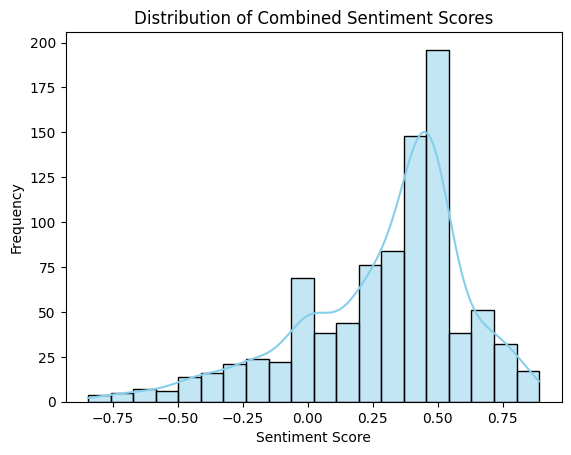

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Sentiment distribution chart
sns.histplot(df["combined_sentiment"], kde=True, bins=20, color="skyblue")
plt.title("Distribution of Combined Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


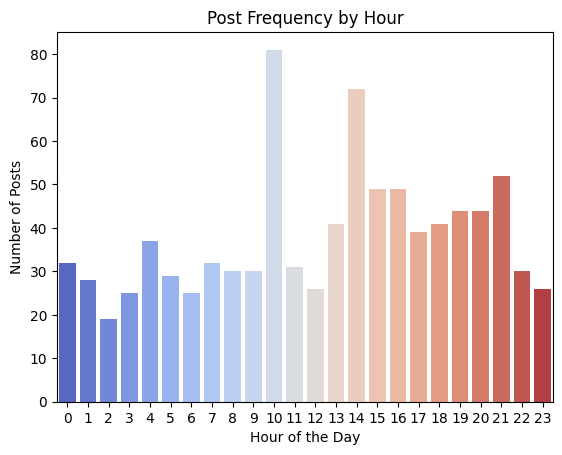

In [ ]:
sns.countplot(x="hour", data=df, palette="coolwarm",legend='False')
plt.title("Post Frequency by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Posts")
plt.show()

POSTING ACTIVITY BY WEEK

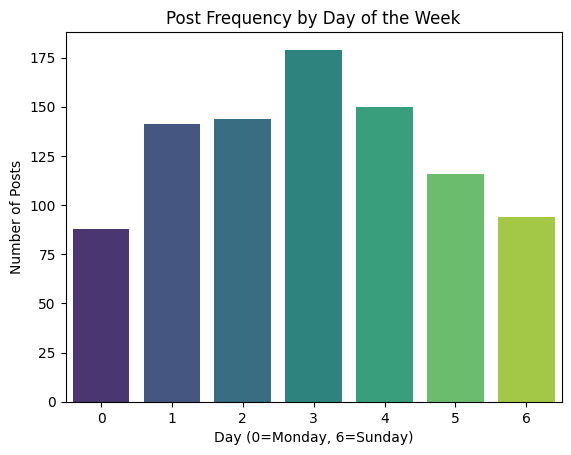

In [ ]:
sns.countplot(x="weekday", data=df, palette="viridis")
plt.title("Post Frequency by Day of the Week")
plt.xlabel("Day (0=Monday, 6=Sunday)")
plt.ylabel("Number of Posts")
plt.show()

In [ ]:


# Load the processed dataset
df = pd.read_csv("feature_extracted_data.csv")

In [ ]:
df.head(20)

,score,num_comments,created_utc,permalink,clean_title,clean_selftext,title_sentiment,body_sentiment,title_sentiment_label,body_sentiment_label,combined_sentiment,normalized_score,normalized_comments,datetime,hour,weekday
0,3,53,1.727773e+09,https://reddit.com/r/StockMarket/comments/1ftj...,rate my portfolio rstockmarket quarterly threa...,please use this thread to discuss your portfol...,0.0000,0.8689,neutral,positive,0.43445,0.000277,0.020511,2024-10-01 09:01:13,9,1
1,1,1,1.733652e+09,https://reddit.com/r/StockMarket/comments/1h9f...,daily general discussion and advice thread dec...,have a general question want to offer some com...,0.0000,0.9648,neutral,positive,0.48240,0.000092,0.000387,2024-12-08 10:00:55,10,6
2,51,13,1.733575e+09,https://reddit.com/r/StockMarket/comments/1h8r...,if you arent having fun in the yahoo finance f...,NaN,-0.7835,0.0000,negative,neutral,-0.39175,0.004702,0.005031,2024-12-07 12:32:33,12,5
3,39,95,1.733578e+09,https://reddit.com/r/StockMarket/comments/1h8s...,hoping to reach 22k in my portfolio and im out...,NaN,0.4404,0.0000,positive,neutral,0.22020,0.003596,0.036765,2024-12-07 13:20:14,13,5
4,4,8,1.733607e+09,https://reddit.com/r/StockMarket/comments/1h92...,investment strategy 2025,hello i have been reading that voo is getting ...,0.0000,0.9859,neutral,positive,0.49295,0.000369,0.003096,2024-12-07 21:37:59,21,5
5,406,181,1.733516e+09,https://reddit.com/r/StockMarket/comments/1h8a...,do you ever wish you had the balls to buy more...,i have 99 of my money tied into the game stock...,0.4019,0.2177,positive,positive,0.30980,0.037433,0.070046,2024-12-06 20:10:57,20,4
6,870,571,1.733490e+09,https://reddit.com/r/StockMarket/comments/1h80...,any ideas on when to exit this is getting crazy,entered at about 20 and were heading to 300 in...,-0.3400,0.8020,negative,positive,0.23100,0.080214,0.220975,2024-12-06 12:52:32,12,4
7,34,43,1.733526e+09,https://reddit.com/r/StockMarket/comments/1h8e...,how to you chose a stock,i am 17 years old and currently have a portfol...,0.0000,0.8399,neutral,positive,0.41995,0.003135,0.016641,2024-12-06 23:05:02,23,4
8,65,21,1.733508e+09,https://reddit.com/r/StockMarket/comments/1h87...,if only i had the cojones,when you buy the right contracts but not enoug...,0.0000,-0.0471,neutral,neutral,-0.02355,0.005993,0.008127,2024-12-06 18:07:59,18,4
9,0,4,1.733577e+09,https://reddit.com/r/StockMarket/comments/1h8s...,anyone can help me with this,own a company called gtt like 3 years ago 300 ...,0.4019,0.9571,positive,positive,0.67950,0.000000,0.001548,2024-12-07 13:11:17,13,5


In [ ]:
import yfinance as yf

# Fetch stock data for specific tickers
tickers = ["AAPL", "TCS", "NVDS", "AMZN", "MSFT", "SBI", "INFY", "GOOG"]  # Example tickers
stock_data = yf.download(tickers, start="2024-10-01", end="2024-12-31", interval="1d", group_by="ticker")

# Flatten MultiIndex columns if needed
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = ['_'.join(col) for col in stock_data.columns]

# Reset index for easier merging or manipulation
stock_data.reset_index(inplace=True)
stock_data.rename(columns={"Date": "datetime"}, inplace=True)

# Preview and save the data to a CSV file
print(stock_data.head())
stock_data.to_csv("stock_data.csv", index=False)


[*********************100%***********************]  8 of 8 completed


    datetime  SBI_Open  SBI_High  SBI_Low  SBI_Close  SBI_Adj Close  \
0 2024-10-01      8.29      8.29     8.21       8.22       8.134975   
1 2024-10-02      8.22      8.22     8.18       8.20       8.115183   
2 2024-10-03      8.24      8.24     8.17       8.17       8.085493   
3 2024-10-04      8.16      8.17     8.15       8.15       8.065699   
4 2024-10-07      8.19      8.20     8.16       8.18       8.095389   

   SBI_Volume  INFY_Open  INFY_High   INFY_Low  ...    GOOG_Low  GOOG_Close  \
0       46100  22.420000  22.520000  22.270000  ...  165.899994  168.419998   
1       41000  22.360001  22.440001  22.170000  ...  166.250000  167.309998   
2       27000  22.190001  22.430000  22.190001  ...  165.369995  167.210007   
3      184300  22.610001  22.879999  22.590000  ...  166.960007  168.559998   
4       82800  22.730000  23.070000  22.719999  ...  164.130005  164.389999   

   GOOG_Adj Close  GOOG_Volume   AAPL_Open   AAPL_High    AAPL_Low  \
0      168.419998     186295

In [ ]:
# List of stock tickers
stocks = ["SBI", "INFY", "MSFT", "AMZN", "TCS", "NVDS", "GOOG", "AAPL"]

# Loop through each stock and create the 'price_up' column based on the 'Adj Close'
for stock in stocks:
    adj_close_col = f"{stock}_Adj Close"  # Adjusted close column for the stock
    price_up_col = f"{stock}_price_up"    # Name of the new 'price_up' column

    # Check if the 'Adj Close' column exists before processing
    if adj_close_col in stock_data.columns:
        stock_data[price_up_col] = (stock_data[adj_close_col].shift(-1) > stock_data[adj_close_col]).astype(int)

#  Confirm the changes
print(stock_data.head())


    datetime  SBI_Open  SBI_High  SBI_Low  SBI_Close  SBI_Adj Close  \
0 2024-10-01      8.29      8.29     8.21       8.22       8.134975   
1 2024-10-02      8.22      8.22     8.18       8.20       8.115183   
2 2024-10-03      8.24      8.24     8.17       8.17       8.085493   
3 2024-10-04      8.16      8.17     8.15       8.15       8.065699   
4 2024-10-07      8.19      8.20     8.16       8.18       8.095389   

   SBI_Volume  INFY_Open  INFY_High   INFY_Low  ...  AAPL_Adj Close  \
0       46100  22.420000  22.520000  22.270000  ...      225.961411   
1       41000  22.360001  22.440001  22.170000  ...      226.530777   
2       27000  22.190001  22.430000  22.190001  ...      225.421982   
3      184300  22.610001  22.879999  22.590000  ...      226.550751   
4       82800  22.730000  23.070000  22.719999  ...      221.446365   

   AAPL_Volume  SBI_price_up  INFY_price_up  MSFT_price_up  AMZN_price_up  \
0     63285000             0              0              0           

In [ ]:
stock_data.to_csv("updated_stock_data.csv", index=False)

In [ ]:
# Fill NaN values (for the last row)
stock_data.fillna(0, inplace=True)


In [ ]:
subreddit_data = pd.read_csv("feature_extracted_data.csv")

# Load the stock data
stock_data = pd.read_csv("stock_data.csv")

# Check the first few rows of both datasets
print(subreddit_data.head())
print(stock_data.head())

   score  num_comments   created_utc  \
0      3            53  1.727773e+09   
1      1             1  1.733652e+09   
2     51            13  1.733575e+09   
3     39            95  1.733578e+09   
4      4             8  1.733607e+09   

                                           permalink  \
0  https://reddit.com/r/StockMarket/comments/1ftj...   
1  https://reddit.com/r/StockMarket/comments/1h9f...   
2  https://reddit.com/r/StockMarket/comments/1h8r...   
3  https://reddit.com/r/StockMarket/comments/1h8s...   
4  https://reddit.com/r/StockMarket/comments/1h92...   

                                         clean_title  \
0  rate my portfolio rstockmarket quarterly threa...   
1  daily general discussion and advice thread dec...   
2  if you arent having fun in the yahoo finance f...   
3  hoping to reach 22k in my portfolio and im out...   
4                           investment strategy 2025   

                                      clean_selftext  title_sentiment  \
0  please us

In [ ]:
# Convert 'datetime' columns to datetime type for easier merging
subreddit_data['datetime'] = pd.to_datetime(subreddit_data['datetime'])
stock_data['datetime'] = pd.to_datetime(stock_data['datetime'])

# Merge the subreddit sentiment data with stock data on 'datetime'
merged_data = pd.merge(stock_data, subreddit_data, on="datetime", how="inner")

# Check the merged data
print(merged_data.head())


Empty DataFrame
Columns: [datetime, SBI_Open, SBI_High, SBI_Low, SBI_Close, SBI_Adj Close, SBI_Volume, INFY_Open, INFY_High, INFY_Low, INFY_Close, INFY_Adj Close, INFY_Volume, MSFT_Open, MSFT_High, MSFT_Low, MSFT_Close, MSFT_Adj Close, MSFT_Volume, AMZN_Open, AMZN_High, AMZN_Low, AMZN_Close, AMZN_Adj Close, AMZN_Volume, NVDS_Open, NVDS_High, NVDS_Low, NVDS_Close, NVDS_Adj Close, NVDS_Volume, TCS_Open, TCS_High, TCS_Low, TCS_Close, TCS_Adj Close, TCS_Volume, GOOG_Open, GOOG_High, GOOG_Low, GOOG_Close, GOOG_Adj Close, GOOG_Volume, AAPL_Open, AAPL_High, AAPL_Low, AAPL_Close, AAPL_Adj Close, AAPL_Volume, score, num_comments, created_utc, permalink, clean_title, clean_selftext, title_sentiment, body_sentiment, title_sentiment_label, body_sentiment_label, combined_sentiment, normalized_score, normalized_comments, hour, weekday]
Index: []

[0 rows x 64 columns]


In [ ]:
# Check the unique datetime values in both datasets
print(subreddit_data['datetime'].head())
print(stock_data['datetime'].head())

# Check the range of dates in both datasets
print(f"Subreddit data date range: {subreddit_data['datetime'].min()} to {subreddit_data['datetime'].max()}")
print(f"Stock data date range: {stock_data['datetime'].min()} to {stock_data['datetime'].max()}")


0   2024-10-01 09:01:13
1   2024-12-08 10:00:55
2   2024-12-07 12:32:33
3   2024-12-07 13:20:14
4   2024-12-07 21:37:59
Name: datetime, dtype: datetime64[ns]
0   2024-10-01
1   2024-10-02
2   2024-10-03
3   2024-10-04
4   2024-10-07
Name: datetime, dtype: datetime64[ns]
Subreddit data date range: 2024-10-01 09:01:13 to 2024-12-08 10:59:00
Stock data date range: 2024-10-01 00:00:00 to 2024-12-06 00:00:00


In [ ]:
# Convert both 'datetime' columns to the same date format
subreddit_data['datetime'] = pd.to_datetime(subreddit_data['datetime']).dt.date
stock_data['datetime'] = pd.to_datetime(stock_data['datetime']).dt.date

# Check again for any common dates
print(subreddit_data['datetime'].head())
print(stock_data['datetime'].head())


0    2024-10-01
1    2024-12-08
2    2024-12-07
3    2024-12-07
4    2024-12-07
Name: datetime, dtype: object
0    2024-10-01
1    2024-10-02
2    2024-10-03
3    2024-10-04
4    2024-10-07
Name: datetime, dtype: object


In [ ]:
# Merge the two datasets on 'datetime'
merged_data = pd.merge(stock_data, subreddit_data, on="datetime", how="inner")

# Check if the merge was successful
print(merged_data.head())


     datetime  SBI_Open  SBI_High  SBI_Low  SBI_Close  SBI_Adj Close  \
0  2024-10-01      8.29      8.29     8.21       8.22       8.134975   
1  2024-11-05      8.01      8.06     8.01       8.04       7.998156   
2  2024-11-06      8.04      8.07     8.00       8.00       7.958364   
3  2024-11-06      8.04      8.07     8.00       8.00       7.958364   
4  2024-11-06      8.04      8.07     8.00       8.00       7.958364   

   SBI_Volume  INFY_Open  INFY_High   INFY_Low  ...  \
0       46100  22.420000  22.520000  22.270000  ...   
1       45900  20.780001  20.809999  20.660000  ...   
2      149900  21.510000  21.600000  21.200001  ...   
3      149900  21.510000  21.600000  21.200001  ...   
4      149900  21.510000  21.600000  21.200001  ...   

                                      clean_selftext  title_sentiment  \
0  please use this thread to discuss your portfol...           0.0000   
1                                                NaN           0.1461   
2                

In [ ]:
# Drop rows with any missing values
merged_data.dropna(inplace=True)

# Or fill missing values (e.g., forward fill)
merged_data.fillna(method='ffill', inplace=True)

# Check the cleaned data
print(merged_data.head())


     datetime  SBI_Open  SBI_High  SBI_Low  SBI_Close  SBI_Adj Close  \
0  2024-10-01      8.29      8.29     8.21       8.22       8.134975   
3  2024-11-06      8.04      8.07     8.00       8.00       7.958364   
4  2024-11-06      8.04      8.07     8.00       8.00       7.958364   
5  2024-11-06      8.04      8.07     8.00       8.00       7.958364   
7  2024-11-07      8.03      8.12     8.03       8.12       8.077740   

   SBI_Volume  INFY_Open  INFY_High   INFY_Low  ...  \
0       46100  22.420000      22.52  22.270000  ...   
3      149900  21.510000      21.60  21.200001  ...   
4      149900  21.510000      21.60  21.200001  ...   
5      149900  21.510000      21.60  21.200001  ...   
7       61300  21.440001      21.66  21.340000  ...   

                                      clean_selftext  title_sentiment  \
0  please use this thread to discuss your portfol...           0.0000   
3  we all know musk and trump have a special rela...           0.2732   
4                

In [ ]:
# Check final merged dataframe
print(merged_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 687
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datetime               657 non-null    object 
 1   SBI_Open               657 non-null    float64
 2   SBI_High               657 non-null    float64
 3   SBI_Low                657 non-null    float64
 4   SBI_Close              657 non-null    float64
 5   SBI_Adj Close          657 non-null    float64
 6   SBI_Volume             657 non-null    int64  
 7   INFY_Open              657 non-null    float64
 8   INFY_High              657 non-null    float64
 9   INFY_Low               657 non-null    float64
 10  INFY_Close             657 non-null    float64
 11  INFY_Adj Close         657 non-null    float64
 12  INFY_Volume            657 non-null    int64  
 13  MSFT_Open              657 non-null    float64
 14  MSFT_High              657 non-null    float64
 15  MSFT_Low   

In [ ]:
# Check for missing values
print(merged_data.isnull().sum())

# Create target variable 'price_up'
merged_data['price_up'] = (merged_data['AAPL_Close'].shift(-1) > merged_data['AAPL_Close']).astype(int)

# Drop irrelevant columns (for simplicity)
columns_to_drop = ['datetime', 'permalink', 'clean_title', 'clean_selftext', 'title_sentiment_label', 'body_sentiment_label', 'created_utc']
merged_data = merged_data.drop(columns=columns_to_drop)

# Drop rows with missing target
merged_data = merged_data.dropna(subset=['price_up'])


# Define features and target
features = ['SBI_Open', 'SBI_High', 'SBI_Low', 'SBI_Close', 'SBI_Adj Close', 'SBI_Volume',
            'INFY_Open', 'INFY_High', 'INFY_Low', 'INFY_Close', 'INFY_Adj Close', 'INFY_Volume',
            'MSFT_Open', 'MSFT_High', 'MSFT_Low', 'MSFT_Close', 'MSFT_Adj Close', 'MSFT_Volume',
            'AMZN_Open', 'AMZN_High', 'AMZN_Low', 'AMZN_Close', 'AMZN_Adj Close', 'AMZN_Volume',
            'TCS_Open', 'TCS_High', 'TCS_Low', 'TCS_Close', 'TCS_Adj Close', 'TCS_Volume',
            'NVDS_Open', 'NVDS_High', 'NVDS_Low', 'NVDS_Close', 'NVDS_Adj Close', 'NVDS_Volume',
            'GOOG_Open', 'GOOG_High', 'GOOG_Low', 'GOOG_Close', 'GOOG_Adj Close', 'GOOG_Volume',
            'AAPL_Open', 'AAPL_High', 'AAPL_Low', 'AAPL_Close', 'AAPL_Adj Close', 'AAPL_Volume',
            'score', 'num_comments', 'combined_sentiment', 'normalized_score', 'normalized_comments',
            'hour', 'weekday']

X = merged_data[features]
y = merged_data['price_up']


datetime               0
SBI_Open               0
SBI_High               0
SBI_Low                0
SBI_Close              0
                      ..
combined_sentiment     0
normalized_score       0
normalized_comments    0
hour                   0
weekday                0
Length: 64, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model with scaled features
model = LogisticRegression(class_weight='balanced',max_iter=5000, random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

In [ ]:
# In the cell where you are calculating evaluation metrics:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make sure you are predicting on the test set (X_test)
y_pred = model.predict(X_test_scaled)  # X_test_scaled should be used for prediction if the model was trained with scaled data

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7803
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       130
           1       0.00      0.00      0.00         2

    accuracy                           0.97       132
   macro avg       0.49      0.49      0.49       132
weighted avg       0.97      0.97      0.97       132



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = LogisticRegression(class_weight='balanced', max_iter=5000)
model.fit(X_train_resampled, y_train_resampled)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the resampled training data or test data
y_train_pred = model.predict(X_train_resampled)

# Evaluate performance
accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train_resampled, y_train_pred))



Accuracy: 0.9483
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       513
           1       0.92      0.98      0.95       513

    accuracy                           0.95      1026
   macro avg       0.95      0.95      0.95      1026
weighted avg       0.95      0.95      0.95      1026

Confusion Matrix:
[[472  41]
 [ 12 501]]


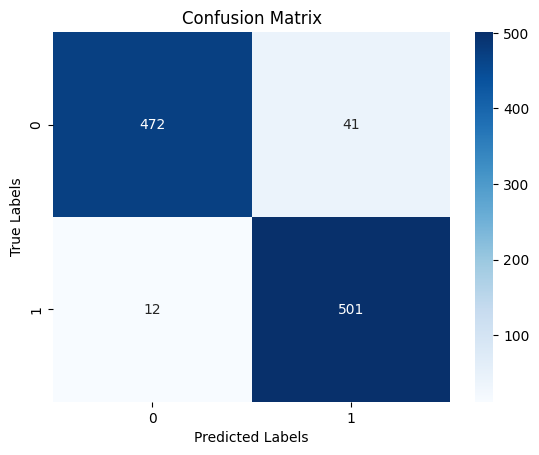

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix (y_true and y_pred are your true and predicted labels)
conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)


sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()